Task2-Unsupervised Mechine learnearning...Kmeans Clustering  

In [22]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [23]:
#Loading Data set from sklearn
Data=datasets.load_iris()

In [24]:
Df=pd.DataFrame(Data.data,columns=Data.feature_names)

In [25]:
Df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
#Select the columns and converted the values into array
X=Df.iloc[:,0:4].values

In [27]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Text(0, 0.5, 'Wcss')

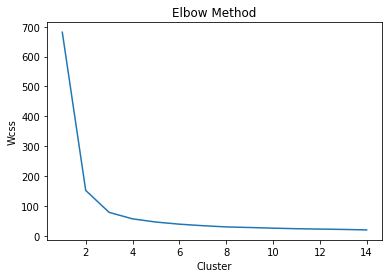

In [28]:
#Using elbow method to find the value of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    k=KMeans(n_clusters=i)
    k.fit(X)
    wcss.append(k.inertia_)
plt.plot(range(1,15),wcss)
plt.title("Elbow Method")
plt.xlabel("Cluster")
plt.ylabel("Wcss")

We Can Understand from the graph that from 3 the wcss decrease significantly So we can choose the cluster number as 3 so the value of n_cluster=3

In [29]:
#Applying the value 3 to the model
k=KMeans(n_clusters=3)
y_predict=k.fit_predict(X)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


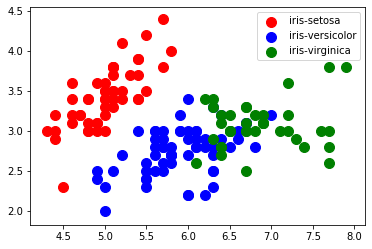

In [30]:
plt.scatter(X[y_predict== 0,0],X[y_predict==0,1],s=100,c='red',label='iris-setosa')
plt.scatter(X[y_predict==1,0],X[y_predict==1,1],s=100,c='blue',label='iris-versicolor')
plt.scatter(X[y_predict==2,0],X[y_predict==2,1],s=100,c='green',label='iris-virginica')
plt.legend()

In [31]:
Df['Species']=y_predict

In [32]:
Df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
for i in Df.index:
    if Df.loc[i,'Species']==0 :
        Df.loc[i,'Species']='iris-setosa'
    elif Df.loc[i,'Species']==1:
        Df.loc[i,'Species']='iris-versicolor'
    elif Df.loc[i,'Species']==2:
        Df.loc[i,'Species']='iris-virginica'

In [38]:
Df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,iris-virginica
146,6.3,2.5,5.0,1.9,iris-versicolor
147,6.5,3.0,5.2,2.0,iris-virginica
148,6.2,3.4,5.4,2.3,iris-virginica


In [39]:
Df.Species.value_counts()

iris-versicolor    62
iris-setosa        50
iris-virginica     38
Name: Species, dtype: int64